In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Camisas  Camisetas  Faldas  Pantalon  Zapatos


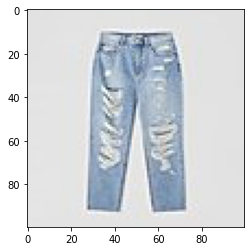

In [99]:
!ls "/content/drive/My Drive/Universidad/Canarias/FSI/data/dataset"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Universidad/Canarias/FSI/data/dataset/Pantalon/pantalon_4.jpg', 'r')
imshow(np.asarray(pil_im))

In [100]:
# DATA SOURCE --------------------------------------------------

image_size = (100, 100)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Universidad/Canarias/FSI/data/dataMejorado",
    validation_split=0.01,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Universidad/Canarias/FSI/data/dataMejorado",
    validation_split=0.01,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Found 3691 files belonging to 5 classes.
Using 3655 files for training.
Found 3691 files belonging to 5 classes.
Using 36 files for validation.


In [101]:
# MODEL --------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential()
model.add(Rescaling(scale=(1./127.5),
                    offset=-1, 
                    input_shape=(100, 100, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [102]:
# TRAINING --------------------------------------------------

epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/200
115/115 [==============================] - 10s 70ms/step - loss: 1.4722 - accuracy: 0.3363 - val_loss: 1.0004 - val_accuracy: 0.7222
Epoch 2/200
115/115 [==============================] - 8s 66ms/step - loss: 1.0172 - accuracy: 0.5885 - val_loss: 0.5348 - val_accuracy: 0.7778
Epoch 3/200
115/115 [==============================] - 8s 69ms/step - loss: 0.6410 - accuracy: 0.7592 - val_loss: 0.2760 - val_accuracy: 0.8333
Epoch 4/200
115/115 [==============================] - 8s 69ms/step - loss: 0.4201 - accuracy: 0.8471 - val_loss: 0.1683 - val_accuracy: 0.9167
Epoch 5/200
115/115 [==============================] - 8s 67ms/step - loss: 0.2568 - accuracy: 0.9078 - val_loss: 0.1127 - val_accuracy: 0.9444
Epoch 6/200
115/115 [==============================] - 9s 71ms/step - loss: 0.2001 - accuracy: 0.9319 - val_loss: 0.1077 - val_accuracy: 0.9167
Epoch 7/200
115/115 [==============================] - 8s 70ms/step - loss: 0.1388 - accuracy: 0.9581 - val_loss: 0.2742 - val_accuracy

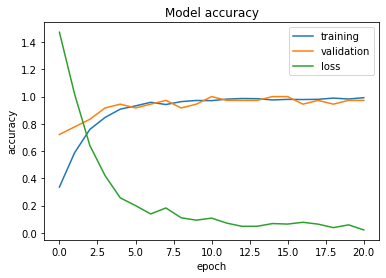

In [103]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        13
           1     1.0000    1.0000    1.0000         3
           2     1.0000    1.0000    1.0000         6
           3     1.0000    1.0000    1.0000         9
           4     1.0000    1.0000    1.0000         5

    accuracy                         1.0000        36
   macro avg     1.0000    1.0000    1.0000        36
weighted avg     1.0000    1.0000    1.0000        36



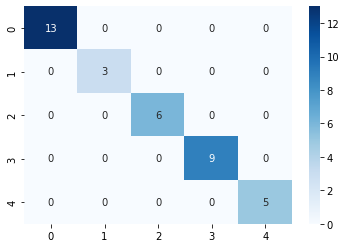

In [105]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

In [109]:
img = keras.preprocessing.image.load_img(
    '/content/drive/My Drive/Universidad/Canarias/FSI/data/dataset/Camisetas/cami_24.jpg', target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)

if np.argmax(predictions[0]) == 0:
  print("Camisa")
elif np.argmax(predictions[0]) == 1:
  print("Camiseta")
elif np.argmax(predictions[0]) == 2:
  print("Falda")
elif np.argmax(predictions[0]) == 3:
  print("Pantalón")
elif np.argmax(predictions[0]) == 4:
  print("Zapato")

Camiseta
